<a href="https://colab.research.google.com/github/OConnorsphysics/Uleth_Data_Science/blob/main/Cern_collision_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color='darkorange'>**CERN Electron Scattering Predicitve Analysis**</font>
Cern , or The European Council for Nuclear Research, operates the world's largest particle physics labratory. This includes experiments that utilize the Large Hadron Collider to study particle collisions. *italicized text*

<img src='https://drive.google.com/uc?export=view&id=1EOX2D5JHvmwNgKcEVvJCfWp8eUFuTbNd' width=500>


In this project we will observe CERN data of electron collision experiments. We will build a shallow and deep machine learning model to compare the predicitve abilities of varying methods. We will start with attempting to predict the transverse momentum of electron 2 after collisions. Transverse momentum is the momentum perpendicular to the electron beam after the collison. Any momentum component along the beam vector can be left over from the intial beam particle momentum. Where as, any perpendicular momentum is due to the physics that occur during the collison. Building an accurate model could be used as a means of confirming calculated particle trajectories, or as a method of uncovering anomolies scietists do not predict.

To solve the problem we will start by cleaning up our data and normalizing all the values to a standard deviation of 1. With a clean dataset we will split our data into three subsets, one for training, validation, and testing. We will train our data on one subset and use the others to tune and test the accuracy, and error of our models. We will start with a linear regression model using an ordinary least squares algorythm, then we will comparethese results to a Keras/tensorflow nueral network. 

Due to the nature of the data I believe we should be able to obtain very accurate predictions. Unlike other data analysis problems there is no human element or subjectiveness in our problem. The outcome is governed by laws of particle physics. With enough data we should be able to predict any of the dataset variables with very high accuracy.

"This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results."

Data credit goes to McCauley, Thomas; (2014). https://opendata.cern.ch/record/304

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import OrdinalEncoder
import tensorflow.keras as keras
import statsmodels.api as sm
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#<font color= 'darkorange'>Importing Data and Preproccessing

##Data Key##
1 Run: The run number of the event.

2 Event: The event number.

3, 11) E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.


4, 5, 6, 12, 13, 14) px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).

7, 15) pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).

8, 16) eta1, eta2: The pseudorapidity of the electron 1 and 2.

9, 17) phi1, phi2: The phi angle of the electron 1 and 2 (rad).

10, 18) Q1, Q2: The charge of the electron 1 and 2.

19) M: The invariant mass of two electrons (GeV).

In [4]:
cern = pd.read_csv('/content/dielectron.csv')

cern

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670


In [5]:
cern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [6]:
cern.dropna(axis=0, how='any', inplace=True)

In [7]:
cern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99915 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99915 non-null  int64  
 1   Event   99915 non-null  int64  
 2   E1      99915 non-null  float64
 3   px1     99915 non-null  float64
 4   py1     99915 non-null  float64
 5   pz1     99915 non-null  float64
 6   pt1     99915 non-null  float64
 7   eta1    99915 non-null  float64
 8   phi1    99915 non-null  float64
 9   Q1      99915 non-null  int64  
 10  E2      99915 non-null  float64
 11  px2     99915 non-null  float64
 12  py2     99915 non-null  float64
 13  pz2     99915 non-null  float64
 14  pt2     99915 non-null  float64
 15  eta2    99915 non-null  float64
 16  phi2    99915 non-null  float64
 17  Q2      99915 non-null  int64  
 18  M       99915 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.2 MB


In [8]:
cern.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,99915.000000,9.991500e+04,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000
mean,147935.420007,4.957471e+08,36.460107,0.135858,0.183211,-1.509100,14.418195,-0.064143,0.022002,-0.005495,44.028549,-0.003442,0.125963,-1.591798,13.804597,-0.072885,0.021772,-0.004234,30.019521
std,920.315526,4.037736e+08,41.225336,13.409322,13.474668,51.625332,12.391213,1.462626,1.799506,0.999990,46.761747,13.130364,13.171806,61.455194,12.463948,1.738660,1.816991,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023716e+08,8.472775,-5.237190,-5.281100,-15.898650,3.773670,-1.284650,-1.526580,-1.000000,11.065550,-4.793870,-4.604685,-22.062650,3.737825,-1.892965,-1.556060,-1.000000,12.445200
50%,147929.000000,3.902917e+08,21.740200,0.141661,0.100544,-0.313360,12.972900,-0.061352,0.035015,-1.000000,25.291400,-0.035653,0.084512,-0.692463,11.690800,-0.136708,0.027453,-1.000000,21.283100
75%,149011.000000,6.339332e+08,50.059250,5.718920,5.652355,13.234400,20.026050,1.145405,1.562680,1.000000,66.983350,4.818905,5.063075,19.041800,19.601700,1.769300,1.597040,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.000000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


We drop the 'Event' and 'Run' columns as they are not useful for predictions.

In [9]:
cern.drop(['Run', 'Event'], axis=1, inplace=True)

In [10]:
cern.rename(columns={'E1':'e1_Energy', 'px1 ':'px1', 'E2':'e2_Energy', 'M':'InvariantMass'}, inplace =True)

##<font color='darkorange'>Splitting Data

In [11]:
cern_train, cern_test = train_test_split(cern, test_size=0.2)
cern_train.shape

(79932, 17)

## <font color='darkorange'>Build a Linear Regression Model


In [12]:
cern_train.columns

Index(['e1_Energy', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'e2_Energy', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'InvariantMass'],
      dtype='object')

In [13]:
linear_reg_model = smf.ols(formula='pt2 ~ e1_Energy + px1 + py1 + pz1 + pt1+ eta1+ phi1+ Q1+ e2_Energy+ px2+ py2+ pz2+ eta2+ phi2+ Q2+ InvariantMass', data=cern_train)

linear_reg_results = linear_reg_model.fit()

cern_train['pt2_pred'] = linear_reg_results.predict(cern_train)
cern_test['pt2_pred'] = linear_reg_results.predict(cern_test)

print(linear_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pt2   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     8804.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:55:40   Log-Likelihood:            -2.7425e+05
No. Observations:               79932   AIC:                         5.485e+05
Df Residuals:                   79915   BIC:                         5.487e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8352      0.052     55.048

## <font color='darkorange'>Visualize our results


Visualizing the predicition of the second electrons energy in relation to the transverse momentum for the training data.

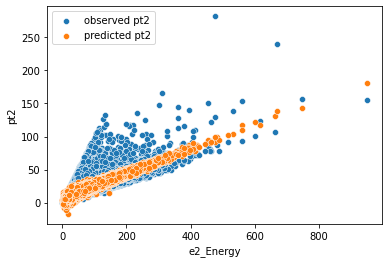

In [14]:
sns.scatterplot(data=cern_train, x='e2_Energy', y='pt2')
sns.scatterplot(data=cern_train, x='e2_Energy', y='pt2_pred')

plt.legend(labels=["observed pt2","predicted pt2"])

Visualizing the predicition of the second electrons energy in relation to the transverse momentum for the testing data.

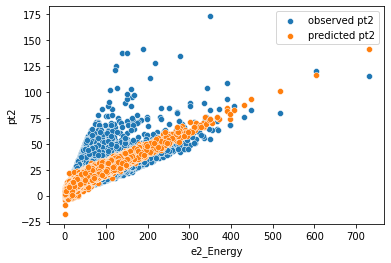

In [15]:
sns.scatterplot(data=cern_test, x='e2_Energy', y='pt2')
sns.scatterplot(data=cern_test, x='e2_Energy', y='pt2_pred')

plt.legend(labels=["observed pt2","predicted pt2"])

## <font color='darkorange'>Error in Linear Regression model

In [16]:
mse_train = sk.metrics.mean_squared_error(cern_train['pt2'], cern_train['pt2_pred'])
mse_test = sk.metrics.mean_squared_error(cern_test['pt2'], cern_test['pt2_pred'])

print(f'The mean squared error in our training dataset was {mse_train}.')
print(f'The mean squared error in our testing dataset was {mse_test}.')

The mean squared error in our training dataset was 55.93402911717868.
The mean squared error in our testing dataset was 59.35367959387496.


# <font color='darkorange'>Building a Nueral Network Regressor

### <font color='darkorange'>Re-Split data for training, testing spliting.

In [17]:
x = cern.drop('pt2', axis=1) #drop electron 2 transvers momentum, as that will be our target variable
y = cern['pt2']

In [18]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, test_size = 0.2)


In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = 0.2)

In [20]:
from sklearn.preprocessing import StandardScaler

# determine numerical columns
numerical_columns = x.select_dtypes(include=['int64', 'float64']).columns

#create scaler
my_scaler = StandardScaler()

#fit and scale
x_train[numerical_columns] = my_scaler.fit_transform(x_train[numerical_columns])
x_val[numerical_columns] = my_scaler.transform(x_val[numerical_columns])
x_test[numerical_columns] = my_scaler.transform(x_test[numerical_columns])

In [21]:
x_train.describe()

,e1_Energy,px1,py1,pz1,pt1,eta1,phi1,Q1,e2_Energy,px2,py2,pz2,eta2,phi2,Q2,InvariantMass
count,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04,6.394500e+04
mean,-1.091177e-16,3.666887e-18,-2.033456e-17,1.155625e-17,6.422609e-17,2.655715e-17,1.466755e-17,-8.756082e-17,9.089436e-17,-4.000241e-18,2.666827e-18,-7.444892e-18,-7.556010e-18,-2.077903e-17,2.122350e-17,-1.097844e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-8.753653e-01,-1.879425e+01,-9.415991e+00,-1.630594e+01,-1.147012e+00,-2.802855e+00,-1.760520e+00,-9.969240e-01,-9.285619e-01,-1.049907e+01,-1.106122e+01,-9.613994e+00,-1.809918e+00,-1.735698e+00,-9.942149e-01,-1.108881e+00
25%,-6.789499e-01,-3.987280e-01,-4.057625e-01,-2.775740e-01,-8.596982e-01,-8.366027e-01,-8.591072e-01,-9.969240e-01,-7.021302e-01,-3.645586e-01,-3.598726e-01,-3.314841e-01,-1.046319e+00,-8.689786e-01,-9.942149e-01,-6.955812e-01
50%,-3.561906e-01,-1.988643e-03,-9.184434e-03,2.432041e-02,-1.154129e-01,2.226177e-03,6.233052e-03,-9.969240e-01,-4.009248e-01,-1.506119e-03,-4.566075e-03,1.410374e-02,-3.993871e-02,-1.267611e-03,-9.942149e-01,-3.448020e-01
75%,3.306498e-01,4.195096e-01,4.061305e-01,2.878007e-01,4.563910e-01,8.277716e-01,8.573210e-01,1.003086e+00,4.918604e-01,3.657559e-01,3.722421e-01,3.364039e-01,1.063406e+00,8.703783e-01,1.005819e+00,3.536151e-01
max,1.981233e+01,1.006905e+01,9.535753e+00,1.000905e+01,2.038272e+01,1.832600e+00,1.736647e+00,1.003086e+00,1.930446e+01,1.241357e+01,1.122614e+01,1.523592e+01,1.800641e+00,1.716477e+00,1.005819e+00,3.185548e+00


In [22]:
from tensorflow.keras import layers

In [23]:
NN_regressor_model = keras.Sequential([
               
                layers.Dense(400, activation= 'relu'),
                layers.Dense(200, activation= 'relu'),
                layers.Dense(1, activation= 'linear')
])

In [24]:
#compile the model
NN_regressor_model.compile(optimizer = 'rmsprop',
                           loss='mse',
                           metrics=['mse'])

In [25]:
model_history = NN_regressor_model.fit(x_train, y_train,
                                       epochs=10, 
                                       batch_size=1000,
                                       validation_data = (x_val, y_val))

Epoch 1/10
64/64 [==============================] - 3s 22ms/step - loss: 67.4679 - mse: 67.4679 - val_loss: 13.7303 - val_mse: 13.7303
Epoch 2/10
64/64 [==============================] - 1s 19ms/step - loss: 4.9161 - mse: 4.9161 - val_loss: 1.7261 - val_mse: 1.7261
Epoch 3/10
64/64 [==============================] - 1s 19ms/step - loss: 1.4507 - mse: 1.4507 - val_loss: 0.9023 - val_mse: 0.9023
Epoch 4/10
64/64 [==============================] - 1s 20ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 5/10
64/64 [==============================] - 1s 19ms/step - loss: 0.7783 - mse: 0.7783 - val_loss: 0.6299 - val_mse: 0.6299
Epoch 6/10
64/64 [==============================] - 1s 17ms/step - loss: 0.6603 - mse: 0.6603 - val_loss: 0.3311 - val_mse: 0.3311
Epoch 7/10
64/64 [==============================] - 1s 18ms/step - loss: 0.5681 - mse: 0.5681 - val_loss: 0.7646 - val_mse: 0.7646
Epoch 8/10
64/64 [==============================] - 1s 19ms/step - loss: 0.5361

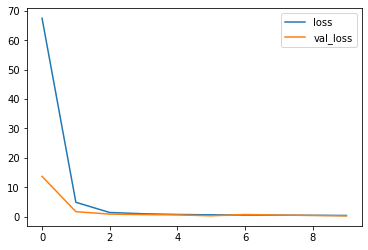

In [26]:
plt.plot(model_history.history["loss"], label='loss')
plt.plot(model_history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

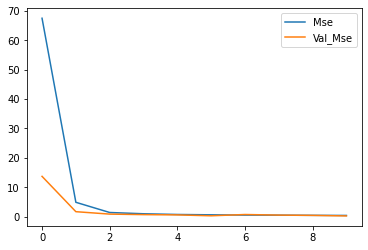

In [27]:
plt.plot(model_history.history["mse"], label='Mse')
plt.plot(model_history.history["val_mse"], label='Val_Mse')
plt.legend()
plt.show()

In [28]:
min(model_history.history['mse'])

0.4473952651023865

This nueral network was built to over fit with 30 epochs, of 2000 batch size. The architecture was 3 hidden layers of 1000, 400, and 200 nodes respectively. This produced a minimum mean squared error of 1.2. The existing architecture returns a mean squared error of 0.43. 




In [29]:
test_loss, test_MAE = NN_regressor_model.evaluate(x_test, y_test)
print(f"test_MAE: {test_MAE}")

625/625 [==============================] - 1s 2ms/step - loss: 0.2759 - mse: 0.2759
test_MAE: 0.2758896052837372


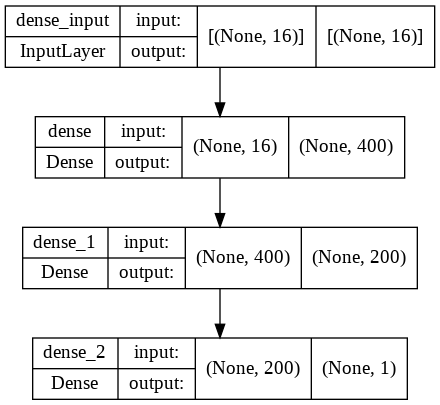

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(NN_regressor_model, show_shapes=True)

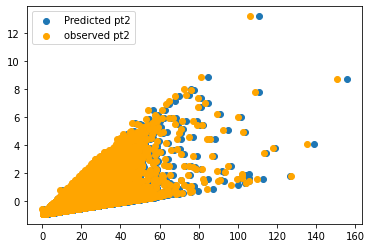

In [31]:
predictions = NN_regressor_model.predict(x_test)

plt.scatter(predictions,x_test["e2_Energy"] )
plt.scatter(y_test,x_test["e2_Energy"], color="orange" )

plt.legend(labels=["Predicted pt2","observed pt2"])

Below we will calculate the coefficient of determination for our neural network.

In [48]:
predictions = predictions.flatten() #reshape data from 2d to 1d 
predictions.shape

(19983,)

In [39]:
y_test.shape

(19983,)

In [35]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [52]:
print('The R^2 value for the nueral network is:')
print(coeff_determination(K.constant(y_test), K.constant(predictions))) #Need to change np.arrays to keras tensors for the keras backend to handle it.

The R^2 value for the nueral network is:
tf.Tensor(0.9982062, shape=(), dtype=float32)


## <font color='darkorange'>Comparing Models


The linear regression model capable of predicting trends but could not accurately recreate the transvers momentum of the second electron. After training we found a mean squared error of 59.4 for our testing dataset. This correlated to a coefficient of determination (R-squared) of 0.638. 

Using a nueral network of two hidden layers, 400 and 200 nodes respectively, we aquired a miniumum testing mean squared error of 0.45. Plotting the predictions shows how accurate this model became when generalized to our testing data. We use the keras backend .square method to find a coefficient of determination (R-squared) of 0.998. This is incredibly high and usually would be a concern when building a model. This could raise concerns about overfitting, however it is determined by comparing predictions on data the model has never seen. I believe the high R-squared value is due to there being mathematical laws governing the outcomes of the experiment. With enough correct data it would appear that model has been trained to mirror the outcome of the laws of particle physics. 

For this application there is a stron case for using the less explainable neural network model. The predicitve abilities far outpace those of the linear regression model. It would be suspected that the linear model fails due to no single variable being directly correlated to the transverse momentum outcome. Unlike the linear model the neural net is capabale of analyzing the impact of multiple variable inter-connected influence on the transverse momentum. The puzzle can be put together quite accurately with all the pieces, but fails when try to compare one variable to the outcome at a time. 

Due to the nature of the problem's audience it would also be encouraged to us the neural net model. Unlike models that are built for reporting profits to company CEOs, or healthcare issues to the general public, this model would be analyzed by mathematicians, physicists, and computer programmers. 